In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv('five-years-spill_incidents.csv')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Data source: [New York Open Data]("https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/data")

### Questions to ask of the data:
1. Where did the most incidents occur?
2. What's the most common type of material spilled?
3. What's the biggest quantity of spill?
4. What are the biggest spills by each county?
5. Longest clean up time
6. Most common and least common source of spills

###### 1. Where did the most incidents occur?

In [2]:
df.county.value_counts()

Westchester                       6311
Suffolk                           5840
Nassau                            4212
Erie                              2673
Orange                            2623
Queens                            2436
Monroe                            2074
Albany                            1992
Kings                             1739
Saratoga                          1731
Onondaga                          1668
Dutchess                          1592
New York                          1532
Rockland                          1364
Ulster                            1363
Niagara                           1262
Bronx                             1090
Rensselaer                        1015
Oneida                             885
Schenectady                        850
Putnam                             831
Jefferson                          792
Broome                             762
Sullivan                           737
Oswego                             696
Warren                   

###### 2. What's the most common type of material spilled?

In [3]:
df.material_name.value_counts().head(5)

#2 fuel oil        13429
transformer oil     7557
hydraulic oil       5874
diesel              5851
gasoline            5125
Name: material_name, dtype: int64

In [4]:
# Least common material spilled
df.material_name.value_counts().tail(5)

other  -  possible raw sewage and solids    1
other  -  fuel conditioner                  1
other  -  buried  cars                      1
other  -  possible gas and fuel release     1
other  -  lavatory waste                    1
Name: material_name, dtype: int64

#### A burried car whaaaa? 🚙

In [5]:
df.loc[df.material_name == 'other  -  buried  cars'].reset_index()

,index,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,26511,1811140,GROUND,RT 22,NaN,HOOSICK FALLS,Rensselaer,NaN,4228,4,02/05/2019,02/05/2019,Deliberate,NaN,Private Dwelling,02/06/2019,other - buried cars,Other,0.0,NaN,0.0


##### 3. What's the biggest quantity of spill?

In [6]:
df.sort_values(by='quantity', ascending=False).head(5)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
7924,1705181,COLONIE LANDFILL ODOR,1319 LOUDON RD RT 9 LANDFILL,COLONIE LANDFILL ROUTE 9 ALBANY,COLONIE COHOES LATHAM WATERFOR,Albany,NaN,126,4,08/23/2017,08/23/2017,Unknown,NaN,Commercial/Industrial,08/24/2017,food waste,Other,1.000000e+11,Pounds,0.0
58779,2107352,AIRPORT - ALLIED AVIATION,90 SOUTH SERVICE RD.,NaN,JAMAICA,Queens,NaN,4101,2,11/09/2021,11/09/2021,Other,NaN,Airport/Aircraft,11/09/2021,jet fuel,Petroleum,3.416000e+06,Gallons,0.0
47666,2007038,DRILL DRILL DRILL,625 ELK ST,NaN,BUFFALO,Erie,NaN,1502,9,11/04/2020,11/04/2020,Equipment Failure,BUFFALO RIVER,Commercial/Industrial,11/05/2020,diesel,Petroleum,3.192000e+06,Gallons,0.0
30707,1902370,FARMINGTON SEWAGE PUMP STATION,NEAR 470 VICTOR-EGYPT ROAD,STONELEIGH TRAIL PONDS,VICTOR,Ontario,14564,3548,8,06/06/2019,06/06/2019,Equipment Failure,WHITE BROOK&#59; 3 P,"Institutional, Educational, Gov., Other",07/07/2020,raw sewage,Other,2.000000e+06,Gallons,0.0
56356,2104929,DRILL DRILL DRILL,545 HENDY CREEK RD,NaN,PINE CITY,Chemung,NaN,836,8,08/24/2021,08/24/2021,Equipment Failure,HENDY CREEK,Commercial/Industrial,08/25/2021,diesel,Petroleum,1.789184e+06,Gallons,0.0


In [7]:
# Let's dig deeper into the biggest spill! Is the address listed in more incidents?
df.loc[df.street_1 == '1319 LOUDON RD RT 9 LANDFILL']

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
6928,1704220,COLONIE LANDFILL ODOR,1319 LOUDON RD RT 9 LANDFILL,COLONIE LANDFILL RT 9,COLONIE COHOES LATHAM WATERFOR,Albany,NaN,126,4,07/28/2017,07/28/2017,Other,NaN,Commercial/Industrial,08/01/2017,other - &quot;garbagy smell&quot;,Other,0.000000e+00,NaN,0.0
7924,1705181,COLONIE LANDFILL ODOR,1319 LOUDON RD RT 9 LANDFILL,COLONIE LANDFILL ROUTE 9 ALBANY,COLONIE COHOES LATHAM WATERFOR,Albany,NaN,126,4,08/23/2017,08/23/2017,Unknown,NaN,Commercial/Industrial,08/24/2017,food waste,Other,1.000000e+11,Pounds,0.0
11800,1708905,COLONIE LANDFILL ODOR,1319 LOUDON RD RT 9 LANDFILL,LANDFILL COLONIE LANDFILL,COLONIE COHOES LATHAM WATERFOR,Albany,NaN,126,4,12/23/2017,12/24/2017,Other,NaN,"Institutional, Educational, Gov., Other",12/26/2017,other - odor,Other,0.000000e+00,NaN,0.0
14079,1711094,COLONIE LANDFILL ODOR,1319 LOUDON RD RT 9 LANDFILL,COLONIE LANDFILL COLONIE LANDFILL,COLONIE COHOES LATHAM WATERFOR,Albany,NaN,126,4,03/06/2018,03/06/2018,Unknown,NaN,"Institutional, Educational, Gov., Other",03/07/2018,other - odor,Other,0.000000e+00,NaN,0.0


##### 4. What are the biggest spills by each county?

In [8]:
# Group the results by county
# Sum the quantity of materials spilled
# Sort the summed quantity in ascending order and display the top five results
df.groupby(by='county')['quantity'].agg('sum').sort_values(ascending=False).head(5)

county
Albany     1.000004e+11
Queens     3.658503e+06
Erie       3.638345e+06
Ontario    2.648872e+06
Niagara    2.254495e+06
Name: quantity, dtype: float64

#### Observation: Most number of spills happened in Westchester, but Albany leads when sorted by quantity of material spilled

In [23]:
# Queens is listed at number two but is the closest to NYC. Let's take a closer look at what's happening in Queens
df.loc[df.county == 'Queens'].sort_values(by='quantity', ascending=False).head(3)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
58779,2107352,AIRPORT - ALLIED AVIATION,90 SOUTH SERVICE RD.,NaN,JAMAICA,Queens,NaN,4101,2,11/09/2021,11/09/2021,Other,NaN,Airport/Aircraft,11/09/2021,jet fuel,Petroleum,3416000.0,Gallons,0.0
23700,1808399,RAVENSWOOD,3854 VERNON BLVD,NaN,LONG ISLAND CITY,Queens,NaN,4101,2,11/07/2018,11/07/2018,Equipment Failure,EAST RIVER,Vessel,11/07/2018,#6 fuel oil,Petroleum,60000.0,Gallons,0.0
30051,1901895,BP SERVICE STATION #36767,21-17 JACKSON AVENUE,NaN,NaN,Queens,NaN,4101,2,05/20/2019,05/20/2019,Housekeeping,NaN,Gasoline Station or other PBS Facility,05/30/2019,diesel,Petroleum,43595.0,Gallons,0.0


Plotting the incidents in queens by the materials spilled, their quantities and sources of spills

In [19]:
from plotnine import *

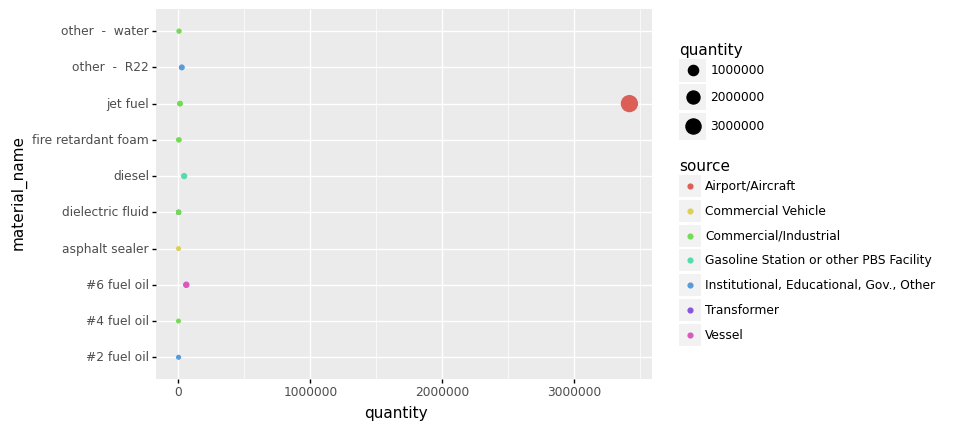

<ggplot: (350672930)>

In [22]:
# For sake of simplicity, only the top twenty incidents are plotted
queens_incidents = df.loc[df.county == 'Queens'].sort_values(by='quantity', ascending=False).head(20)
ggplot(queens_incidents, aes(y='material_name', x='quantity', color='source'))+geom_point(aes(size = 'quantity'))

##### 5. Longest clean up time

In [ ]:
df.dtypes

In [ ]:
df['spill_date'] = pd.to_datetime(df.spill_date, format="%m/%d/%Y", errors='coerce')
df['close_date'] = pd.to_datetime(df.close_date, format="%m/%d/%Y", errors='coerce')

In [ ]:
df.dtypes

In [ ]:
df['recovery_days'] = df['close_date'] - df['spill_date']

In [ ]:
df.sort_values(by='recovery_days', ascending=False).head(5)

##### 6. What are the most and least common sources of spills?

In [ ]:
df.source.value_counts()

In [ ]:
df.loc[df.source == 'Chemical Bulk Storage Facility']

#### Is there a particular month in which most spills tend to occur?

In [ ]:
df.spill_date.dt.month.value_counts()

In [ ]:
df.spill_date.dt.month.value_counts().plot(kind='bar', color='gray')

In [ ]:
df.resample('M', on='spill_date').size().sort_values(ascending=False).head(5)

Observation: Overall, most spills occured in July and August. More specifically, most spills in a single month happened in August 2020

### Some quick visualizations!

### Charts to make:
1. Recovery days plotted by county
2. Number of spills plotted by county
3. Quantity and type of material spilled

In [ ]:
# (ggplot(df, aes('recovery_days', 'county'))+ geom_point())

In [ ]:
df.head(5)

In [ ]:
df.dtypes

In [ ]:
# import numpy as np
# df.recovery_days.astype('timedelta64[D]')/np.timedelta64(1, 'D')

In [ ]:
df.recovery_days.astype(int)

In [ ]:
df['recovery_to_plot'] = df.recovery_days.astype(int)/86400000000000

In [ ]:
df.head(5)

In [ ]:
(ggplot(df, aes('county', 'recovery_to_plot'))+ geom_line())

In [ ]:
df.recovery_to_plot.value_counts()

In [ ]:
df.loc[df.recovery_to_plot == -106751.991167]

In [ ]:
# df.recovery_days.value_counts()

In [ ]:
df.groupby(by='county').plot(y='recovery_to_plot', x='county', figsize=(10,3))

In [ ]:
(ggplot(df, aes('county', 'material_name'))+ geom_point())

In [ ]:
ggplot(df, aes(x='county', y='material_name')) + geom_boxplot()

In [ ]:
df.nunique()

In [ ]:
df.groupby(by='county')['quantity'].agg('sum').sort_values(ascending=False).head(5).plot()

In [ ]:
df.groupby(by='county').recovery_to_plot.mean().head(5).plot()

In [ ]:
counties_to_plot = df.groupby(['county', 'material_name'])['recovery_days'].agg('mean').reset_index().sort_values(by='recovery_days', ascending=False).head(5)
counties_to_plot

In [ ]:
# Plot - recovery days, county, materia

In [ ]:
df.loc[df.county == 'Rockland']

In [ ]:
df = df.dropna('recovery_to_plot')

In [ ]:
counties_to_plot = df.groupby(['county', 'material_name'])['recovery_to_plot'].agg('mean').reset_index().sort_values(by='recovery_to_plot', ascending=False).head(5)
counties_to_plot

In [ ]:
ggplot(counties_to_plot, aes(x='material_name', y='recovery_to_plot', color='county'))+geom_point(aes(size = 'recovery_to_plot'))

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.recovery_to_plot.value_counts()

In [ ]:
df.material_name.value_counts()

In [ ]:
df.loc[df.county == 'Westchester'].reset_index()

In [ ]:
df.loc[df.county == 'Westchester'].contributing_factor.value_counts()

In [ ]:
df.county.unique()

In [ ]:
df.loc[df.county == 'Westchester'].reset_index()

In [ ]:
df.loc[df.county == 'Westchester'].source.value_counts().plot(kind='barh', color='red', figsize=(8,6), title='Number of spills in Albany by source type')

In [ ]:
fig = df.loc[df.county == 'Westchester'].source.value_counts().plot(kind='barh', color='red', figsize=(8,6), title='Number of spills in Albany by source type')

In [ ]:
df.loc[df.county == 'Albany'].source.value_counts().plot(kind='bar')

In [ ]:
df.source.value_counts().plot(kind='barh', color='gray', figsize=(8,6), title='Source of spills')

In [ ]:
source_to_plot =df.groupby(['source', 'county', 'material_name'])['quantity'].agg('sum').reset_index().sort_values(by='quantity', ascending=False).head(10)

In [ ]:
ggplot(source_to_plot, aes(x='county', y='source', color='material_name'))+geom_point(aes(size = 'quantity'))